<a href="https://colab.research.google.com/github/SmirnygaTotoshka/FBB_Courses/blob/main/ML_in_Bio_Lec_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обзор машинного обучения. Лекция 1

## Введение в машинное обучение

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/ai_ml_dl_relations.png" alt="Drawing" width= "700px;"/></div>

<div align='center'><b>Мы в рамках этого курса будем говорить именно про ML и DL.</b></div>

<b>ML - это про программирование.</b>

<b>ML</b> - способ заставить компьютер выполнить какую-то задачу (как и обычное программирование). Как минимум, задача должна быть формализуема (не ждите, что компьютер сам поймёт, что делать). 

Проблема в том, что для задач, подходящих для ML, очень трудно придумать набор правил и пошагово записать их для компьютера, как в других программистских задачах. 

Давайте-ка лучше программа выучит закономерности в данных и научится решать задачу... Для того, чтобы оценить, как хорошо эта задача решается, должна быть метрика оценки качества. Говорят, что программа ***P*** *обучается* решать некоторую задачу ***T***, если по мере накопления опыта ***E*** улучшается метрика оценки качества выполнения этой задачи ***M***. 

<b>Давайте сразу на примере?</b>

In [ ]:
import warnings

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

brca = load_breast_cancer()
print(brca.DESCR)
X = pd.DataFrame(columns=brca.feature_names, data=brca.data)
y = brca.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Как правило, каждый из объектов задается набором признаков:<br>
$f_j: X\rightarrow D_j, j=1,\ldots,n$.

Признаки могут быть разные по природе:
1. бинарные $D_j=\{0,1\}$;
2. номинальные (категории) $|D_j| < \infty$;
3. порядковые (ранги) $|D_j| < \infty$, $D_j$ - упорядочено;
4. количественные $D_j = \mathcal{R}$.

Объект - вектор из признаков. В машинном обучении принято, чтобы объекты были в строках, а признаки - в столбцах. 

Посмотрим на описание объектов в данном примере. 

In [ ]:
X 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Посмотрим, что хотим научиться предсказывать.

In [ ]:
print(brca.target_names)
print(y)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

**Мы говорили, что программа должна лучше выполнять задачу в рамках некоторой метрике по мере накопления опыта, верно?**<br>
Посмотрим на это. 

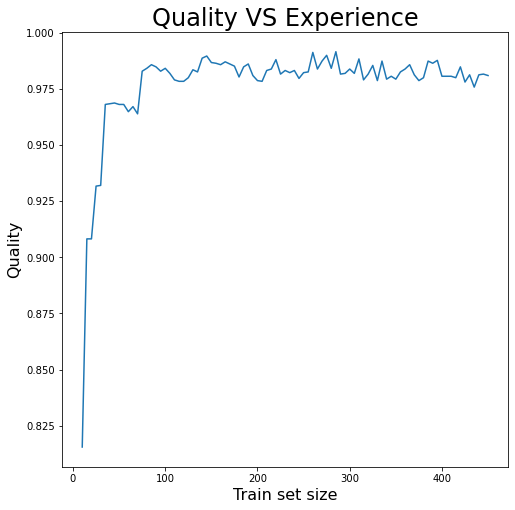

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

clf = LogisticRegression(random_state=1)

shape = range(10, X_train.shape[0], 5)
eval_res = pd.DataFrame(index=shape, columns=['Train set size',
                                              'Test AUC-ROC'])
eval_res['Train set size'] = list(shape)

for i in shape:
    clf.fit(X_train[:i], y_train[:i])
    y_pred = clf.predict_proba(X_test)[:, 1]
    test_score = roc_auc_score(y_true=y_test,
                               y_score=y_pred)
    eval_res.at[i, 'Test AUC-ROC'] = test_score

plt.figure(figsize=(8, 8))
plt.title('Quality VS Experience', fontdict={'fontsize': 24})
plt.ylabel('Quality', fontdict={'fontsize': 16})
plt.xlabel('Train set size', fontdict={'fontsize': 16})
plt.plot(eval_res['Train set size'], eval_res['Test AUC-ROC']);

Итак, у нас некоторый алгоритм предсказывал, является ли новообразование злокачественным или доброкачественным (**задача**), причём делал это лучше с точки зрения **метрики** AUC-ROC по мере увеличения размера обучающей выборки (**опыта**). 

Что концептуально произошло? 
<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/workflow.png" alt="Drawing" width= "900px;"/></div>

В данном "игрушечном" примере извлечение признаков сделали за нас, но всё же кто-то эти признаки придумал. 

Мы посмотрели на один пример машинного обучения, но оно бывает разное.

## Некоторые серьёзные успехи ML в биологии

### AlphaFold2 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/af2.png" alt="Drawing" width= "1000px;"/></div>

![alphafold2](https://lh3.googleusercontent.com/J5RC0j1DeUWaNc5h6nGwJwsQSLUuTXINP6we2ymLJ_WUg9bH-hvfvI8WVFeghN-_YR69MryNK5O2rFcVNwz9PZePpBtLdwdshCGzLdM=w1440-rw-v1)
Source: https://deepmind.com/blog/article/alphafold-a-solution-to-a-50-year-old-grand-challenge-in-biology

https://doi.org/10.1038/s41586-021-03819-2

Но иногда бывает и такое... 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/fail.jpg" alt="Drawing" width= "400px;"/></div>

К чести AlphaFold2, степень уверенности модели в петлях низкая.

### Отбор/генерация молекул - кандидатов в лекарства

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/antibiotic_discovery.png" alt="Drawing" width= "600px;"/></div>

Source: https://doi.org/10.1016/j.cell.2020.01.021

### Ускорение super-resolution микроскопии

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/anna_palm.png" alt="Drawing" width= "800px;"/></div>

Source: https://doi.org/10.1038/nbt.4106

## Виды машинного обучения

* <b>Supervised learning</b> (обучение на размеченных данных/обучение по прецедентам/обучение с учителем)
* <b>Unsupervised learning</b> (обучение на неразмеченных данных/обучение без учителя)
* *Semi-supervised learning* (обучение на частично размеченных данных/обучение с частичным привлечением учителя)
* Reinforcement learning (обучение с подкреплением)
* *Self-supervised learning* (самообучение)
* ... 

### Обучение на размеченных данных 

Пусть $X$ - признаковое пространство объектов, а $Y$ - множество допустимых значений целевой переменной.<br>
Исходя из предположения о существовании функции $y: X \rightarrow Y$, и имея<br>
*обучающую выборку* $\{x_1, \ldots, x_l\}\subset X$<br>
с *известными ответами* $y_i=y(x_i), i=1,\ldots,l$ ($y$ тоже может быть вектором!)<br>

***хотим найти:***
$a: X \rightarrow Y$ - алгоритм, приближающий $y$ на всем множестве $X$.

*Метод обучения* $\mu: (X\times Y)\rightarrow A$, по произвольной обучающей выборке $X^l=(x_i, y_i)_{i=1}^l$ находит некоторый соответствующий алгоритм $a\in A$.

$A=\{g(x,\theta) | \theta\in\Theta\}$ - параметрическое семейство функций,
где $g: X\times\Theta\rightarrow Y$ - фиксированная функция.
$\theta$ - веса модели. 

In [ ]:
clf = LogisticRegression(random_state=1)

* Обучение модели на имеющихся данных: метод $\mu$ по выборке $X^l$ строит алгоритм $a=\mu(X^l)$. 

$\Bigg[\begin{pmatrix} f_1(x_1) & \ldots & f_n(x_1) \\ \ldots & \ldots & \ldots \\ f_1(x_l) & \ldots & f_n(x_l) \end{pmatrix} \rightarrow \begin{pmatrix} y_1 \\ \ldots \\ y_l \end{pmatrix} \Bigg]\rightarrow a$<br>

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=1)

* Применение обученной модели на новых данных: алгоритм $a$ для новых объектов $x$ выдает ответы $a(x)$. 

$\begin{pmatrix} f_1(x'_1) & \ldots & f_n(x'_1) \\ \ldots & \ldots & \ldots \\ f_1(x'_k) & \ldots & f_n(x'_k) \end{pmatrix} \rightarrow \begin{pmatrix} a(x'_1) \\ \ldots \\ a(x'_k) \end{pmatrix}$

In [ ]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0])

![fit-predict](https://www.meme-arsenal.com/memes/9dc9a016bb80921aa7be05ad62400f94.jpg)

Ура, мы умеем в ML? Где наша з/п 300 килорублей в секунду???

Не совсем...

**ML - это про статистику.**

По выборке мы хотим получить представление о генеральной совокупности, а именно - оценить плотность $p(y|x)$.<br>
Если выборка нерепрезентативна, то ничего не получится. Дизайн эксперимента важен! 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/lifecycle.png" alt="Drawing" width= "1000px;"/></div>


Этапы получения и препроцессинга данных невероятно важны! 

**ML - это иногда про Авгиевы конюшни**, ведь данные могут быть:

* неточными - погрешности измерения, в биологии регулярно;
* разнородными - указаны в разных шкалах или единицах измерения;
* неполными - есть пропуски в данных, для некоторых объектов не указано(ы) значение(я);
* противоречивыми - разные ответы для одинаковых объектов;
* избыточными - слишком много объектов - вычислительно трудно их обрабатывать, слишком много признаков - много шума;
* недостаточными - объектов мало, признаков много (GWAS);
* неструктурированными - нет признаковых описаний (в случае картинок, аудио, видео, текстов и пр. - DL в помощь);
* ...

In [ ]:
survey = pd.read_csv('developer_survey_2020/survey_results_public.csv')

In [ ]:
survey.head(10) 

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


<b>ML - это про оптимизацию.</b>

Как мы оценим, насколько хорошо работает наша модель?<br>

$L(a,x)$ - функция потерь - величина ошибки алгоритма $a\in A$ на объекте $x\in X$.<br>
Функционал качества, или эмпирический риск - среднее арифметическое ошибок на выборке: $Q(a, X^l)=\frac{1}{l}\sum_{i=1}^l L(a, x_i)$<br>
Метод обучения должен найти минимум функционала качества. 
$\mu(X^l)=\arg\min_{a\in A}Q(a, X^l)$

Поиск экстремума функции - это задача оптимизации. 

#### Классификация 

* $Y=\{0, 1\}$ - бинарная классификация;
* $Y=\{1,\ldots,M\}$ - множественная классификация на $M$ непересекающихся классов;
* $Y=\{0,1\}^M$ - множественная классификация на $M$ классов, которые могут пересекаться.

В нашем самом первом примере мы решали как раз задачу бинарной классификации.

Околобиологические/биомедицинские примеры множественной классификации: 

Предсказание по фотографии участка кожи, является ли образование на ней нормой, доброкачественной неоплазией или злокачественной неоплазией. 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/skin_lesions_dl.png" alt="Drawing" width= "1000px;"/></div>

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/Skin.png" alt="Drawing" width= "1000px;"/></div>

Source: https://doi.org/10.1038/nature21056

Предсказание по фотографии гистологического среза, нормальное ли это лёгкое, LUAD или LUSC, а также статус некоторых часто мутирующих в раках лёгкого генов. 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/luad_lusc_normal.png" alt="Drawing" width= "1000px;"/></div>

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/lusc_luad.png" alt="Drawing" width= "300px;"/></div>


Source: https://doi.org/10.1038/s41591-018-0177-5


Предсказания ответа на терапию, эффектов SNV, статуса метилирования, элементов вторичной структуры, типа клетки и т.д. и т.п. 

#### Регрессия 

$Y=\mathcal{R}$ или $Y=\mathcal{R}^m$.

Предсказание непрерывной переменной. 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/bond_diss_ent.png" alt="Drawing" width= "800px;"/></div>

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/enthalpy.png" alt="Drawing" width= "600px;"/></div>


Source: https://doi.org/10.1038/s41467-020-16201-z 

Предсказание констант полуингибирования чего-нибудь для веществ, констант диссоциации для комплексов, уровня экпрессии гена и прочее, и прочее... 

#### Ранжирование

$Y$ - упорядоченное множество.

Наиболее типичные примеры - из более классического бизнеса: порядок поисковой выдачи, рекомендация товаров и пр.

Биомедицинское: предсказание группы риска пациента, ранжирование терапий/клинических испытаний, подходящих для данного пациента. 

#### Ещё некоторые важные челленжи в биологии

* Basecalling (особенно для ONT) 
<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/bc_ont.png" alt="Drawing" width= "800px;"/></div>

Source: https://doi.org/10.1101/2020.02.25.956771


* Hi-C super resolution 
<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/hic_pipeline.png" alt="Drawing" width= "800px;"/></div>

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/hic.png" alt="Drawing" width= "800px;"/></div>

Source: https://doi.org/10.1038/s41467-018-03113-2


* Missing data imputation (особенно для single-cell) 
<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/scimpute.png" alt="Drawing" width= "800px;"/></div>

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/scigan.png" alt="Drawing" width= "800px;"/></div>


Source: https://doi.org/10.1038/s41467-018-03405-7


### Обучение на неразмеченных данных 

На бытовом уровне задача формулируется как "найти какую-нибудь структуру в данных". Чувствуете, что формулировка уже куда менее строгая? Выражаясь статистически, оценить распределение $p(x)$, порождающее данные. 

#### Кластеризация

Наиболее часто в этом виде машинного обучения встречается задача кластеризации:

Пусть $X$ - признаковое пространство объектов, дана $\{x_1, \ldots, x_l\}\subset X$ - выборка<br>
и определена функция расстояний между объектами $\rho: X\times X\rightarrow[0,\infty)$. 

**Хотим найти:**<br>
$Y$ - множество кластеров;
$a: X\rightarrow Y$ - алгоритм кластеризации такой, что в результате его работы выполняется:   
* объекты внутри одного кластера похожи;   
* объекты разных кластеров различны.

Филогенетическая реконструкция - это кластеризация. 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/sars2_tree.png" alt="Drawing" width= "800px;"/></div>


Source: https://doi.org/10.1038/s41598-020-79484-8

Исходя из числа мутантных и референсных ридов, картированных на позиции с мутациями, оценить структуру клеточных популяций опухоли. 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/sciclone.png" alt="Drawing" width= "400px;"/></div>

Source: https://doi.org/10.1371/journal.pcbi.1003665


#### Снижение размерности 

Задача снижения размерности заключается в нахождении оптимальной проекции объектов в пространство более низкой размерности. Нужна как для удобства визуализации многомерных данных, так и для получения более компактного их представления для других задач. 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/scrna.png" alt="Drawing" width= "800px;"/></div>


Source: https://doi.org/10.1038/nbt.4314 


#### Детекция аномалий 

Эта задача определения выбросов или "новых" данных, т.е., возможно, порождённых другим распределением, объекты из которого не присутствовали в выборке. 

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/anomaly_ts.png" alt="Drawing" width= "800px;"/></div>



Но это не обязательно временной ряд.

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/cancer_anomaly.png" alt="Drawing" width= "800px;"/></div>

<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/anomaly.png" alt="Drawing" width= "600px;"/></div>


Source: https://doi.org/10.3389/fgene.2019.00599


<div align='center'><img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/introductory/evol_bvae.png" alt="Drawing" width= "800px;"/></div>


Source: https://doi.org/10.1101/2020.12.21.423785

"The natural distribution of protein sequences we observe across organisms is the result of billions of evolutionary experiments. By modeling that distribution, we implicitly capture constraints on the protein sequences that maintain fitness."


:)